In [1]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score

import datetime
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook"

In [26]:
# Import dataset
print("Loading dataset...")
dataset = pd.read_csv("Walmart_Store_sales.csv")
print("...Done.")
print()

Loading dataset...
...Done.



In [28]:
# Basic stats
print("Number of rows : {}".format(dataset.shape[0]))
print()
print("Number of columns : {}".format(dataset.shape[1]))
print()


print("Display of dataset: ")
display(dataset.head())
print()

print("Description types of variables: ")
print()
display(dataset.info())
print()

print("Basics statistics: ")
data_desc = dataset.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0])

Number of rows : 150

Number of columns : 8

Display of dataset: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092



Description types of variables: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


None


Basics statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000



Percentage of missing values: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

In [29]:
# Boxplot
numeric_features = ["Temperature","Fuel_Price","CPI","Unemployment"]
for i in range(len(numeric_features)):
    fig = px.box(dataset[numeric_features[i]])
    fig.show()

In [30]:
dataset["Holiday_Flag"].unique()

array([nan,  0.,  1.])

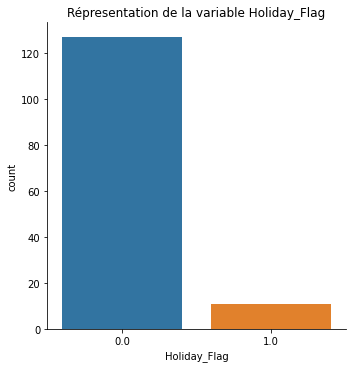

In [33]:
# Répartition de la variable Holiday_Flag
sns.catplot(x='Holiday_Flag', kind="count", palette="tab10", 
            data=dataset).set(title='Répresentation de la variable Holiday_Flag');

### Preprocessing to be planned with pandas


In [6]:
# Drop lines containing invalid values or outliers (Unemployment)
print("Maximum :",dataset['Unemployment'].mean() + 3*dataset['Unemployment'].std())
print("Minimum :",dataset['Unemployment'].mean() - 3*dataset['Unemployment'].std())
to_keep = (dataset['Unemployment'] < 12.52)
df = dataset.loc[to_keep,:] 

Maximum : 12.329947132356104
Minimum : 2.8669121269031557


In [7]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
...,...,...,...,...,...,...,...,...
142,3.0,07-10-2011,403342.40,0.0,75.54,3.285,NaN,7.197
143,3.0,04-06-2010,396968.80,0.0,78.53,2.705,214.495838,7.343
144,3.0,19-10-2012,424513.08,0.0,73.44,3.594,226.968844,6.034
145,14.0,18-06-2010,2248645.59,0.0,72.62,2.780,182.442420,8.899


In [8]:
fig = px.box(df, x="Unemployment")
fig.show()

In [9]:
# Drop lines where target values are missing
df = df.dropna(subset=["Weekly_Sales"])

In [17]:
#Create usable features from the Date column
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime('%d.%m.%Y')
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Day'] = pd.DatetimeIndex(df['Date']).day
df['Day_of_week'] = pd.DatetimeIndex(df['Date']).day_of_week

In [18]:
df = df.drop("Date",axis=1)

In [19]:
# Check
df["Weekly_Sales"].isnull().sum()

0

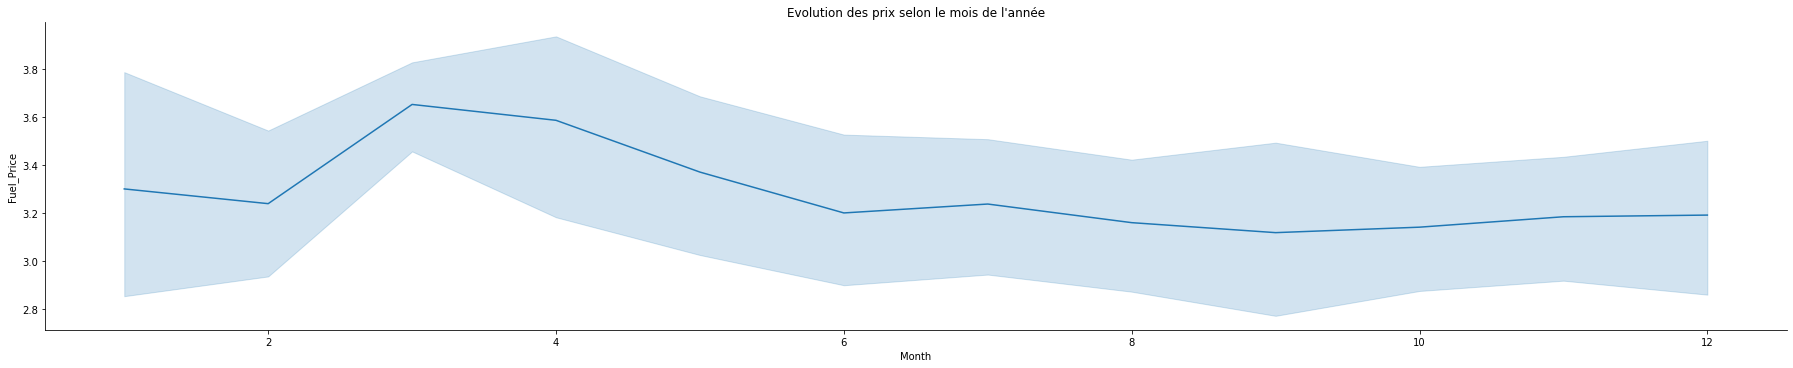

In [25]:
sns.relplot(x="Month",y ="Fuel_Price",data = df, kind="line", height =5, aspect = 5)\
            .set(title="Evolution des prix selon le mois de l'année");

### 2.- Regression Linéaire

In [34]:
# Separate target variable Y from features X
print("Separating labels from features...")
X = df.drop('Weekly_Sales',axis=1).values
y = df['Weekly_Sales'].values
display(y[0:5])
print()
display(X[0:5,:])
print()

Separating labels from features...


array([1572117.54, 1807545.43, 1244390.03, 1644470.66, 1857533.7 ])

array([[6.00000000e+00,            nan, 5.96100000e+01, 3.04500000e+00,
        2.14777523e+02, 6.85800000e+00, 2.01100000e+03, 2.00000000e+00,
        1.80000000e+01, 4.00000000e+00],
       [1.30000000e+01, 0.00000000e+00, 4.23800000e+01, 3.43500000e+00,
        1.28616064e+02, 7.47000000e+00, 2.01100000e+03, 3.00000000e+00,
        2.50000000e+01, 4.00000000e+00],
       [1.10000000e+01, 0.00000000e+00, 8.45700000e+01,            nan,
        2.14556497e+02, 7.34600000e+00,            nan,            nan,
                   nan,            nan],
       [6.00000000e+00, 0.00000000e+00, 7.88900000e+01, 2.75900000e+00,
        2.12412888e+02, 7.09200000e+00, 2.01000000e+03, 5.00000000e+00,
        2.80000000e+01, 4.00000000e+00],
       [4.00000000e+00, 0.00000000e+00,            nan, 2.75600000e+00,
        1.26160226e+02, 7.89600000e+00, 2.01000000e+03, 5.00000000e+00,
        2.80000000e+01, 4.00000000e+00]])

In [35]:
# First : always divide dataset into train set & test set !!
print("Dividing into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [36]:
# Create pipeline for numeric features
numeric_features = [2,3,4,5,6,7]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [37]:
categorical_features = [0,1]
categorical_transformer = Pipeline(
steps = [
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("encoder",OneHotEncoder(drop="first"))
])

In [38]:
# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        
    ('cat',categorical_transformer,categorical_features)
    ])

In [39]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train[0:5,:])
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5,:])
print()


Performing preprocessings on train set...
[[   5.           0.          62.37               nan  212.5604113
     6.768     2010.          12.          11.           5.       ]
 [  20.           0.          69.37               nan          nan
     7.527     2010.           9.          24.           4.       ]
 [  10.           0.          90.32               nan  126.1266
     9.524     2010.           6.          25.           4.       ]
 [   3.           0.          80.19         3.467      219.7414914
     7.567     2011.           9.          23.           4.       ]
 [  20.           0.          39.79         3.739      213.4725116
     6.961              nan          nan          nan          nan]]
...Done.
  (0, 0)	0.10448788196533808
  (0, 1)	0.29127355614037537
  (0, 2)	0.82827321950786
  (0, 3)	-0.6645275453502594
  (0, 4)	-1.1146551006003407
  (0, 5)	1.6233537151990765
  (0, 9)	1.0
  (1, 0)	0.5126279635309292
  (1, 1)	0.29127355614037537
  (1, 2)	0.4302873661072788
  (1, 3)

In [40]:
# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test[0:5,:])
X_test = preprocessor.transform(X_test) 
print('...Done.')
print(X_test[0:5,:])
print()

Performing preprocessings on test set...
[[1.30000000e+01 0.00000000e+00 6.11100000e+01 3.78800000e+00
  1.30959226e+02 5.96500000e+00 2.01200000e+03 1.00000000e+00
  6.00000000e+00 4.00000000e+00]
 [4.00000000e+00 0.00000000e+00            nan 2.75600000e+00
  1.26160226e+02 7.89600000e+00 2.01000000e+03 5.00000000e+00
  2.80000000e+01 4.00000000e+00]
 [1.00000000e+01 0.00000000e+00 5.76200000e+01 3.88200000e+00
  1.30645793e+02 7.54500000e+00 2.01200000e+03 2.00000000e+00
  3.00000000e+00 4.00000000e+00]
 [1.00000000e+00            nan 9.16500000e+01 3.68400000e+00
  2.15544618e+02 7.96200000e+00 2.01100000e+03 5.00000000e+00
  8.00000000e+00 6.00000000e+00]
 [7.00000000e+00 0.00000000e+00 3.66100000e+01 3.76700000e+00
  1.92826069e+02 8.59500000e+00 2.01100000e+03 5.00000000e+00
  1.30000000e+01 4.00000000e+00]]
...Done.
  (0, 0)	0.031022667283531855
  (0, 1)	1.0113744177821578
  (0, 2)	-1.3282548056193724
  (0, 3)	-1.472824904899565
  (0, 4)	1.4041759059509373
  (0, 5)	-1.859941140

In [41]:
# Train model
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("...Done.")

Train model...
...Done.


In [42]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = regressor.predict(X_train)
print("...Done.")
print(Y_train_pred[1:4])
print()

Predictions on training set...
...Done.
[1915605.5993155  1763307.75123103  386608.98556792]



In [43]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = regressor.predict(X_test)
print("...Done.")
print(Y_test_pred[1:4])
print()

Predictions on test set...
...Done.
[2165273.43680882 1811731.3942121  1343617.07351172]



In [44]:
# Print R^2 scores 
# Evalue la performance du modèle par rapport au niveau de variation présent dans les données.
print("R2 score on training set : ", r2_score(y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(y_test, Y_test_pred))

R2 score on training set :  0.9643569505901335
R2 score on test set :  0.949749207119082


### Regression Ridge

In [46]:
# Test for finding the good value of alpha
from sklearn.linear_model import Ridge
scores = []
for alpha in [0.1,1.0,10.0,100.0,1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    ridge.pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test,y_test))
print(scores)

[0.9319076714560037, 0.8542648731595893, 0.46225008490496533, 0.11043938585759139, -0.01707555696037999]


In [47]:
# Perform grid search
print("Grid search...")
regressor = Ridge()
# Grid of values to be tested
params = {
    'alpha': [0.0, 0.1, 0.5, 1.0] 
}
gridsearch = GridSearchCV(regressor, param_grid = params, cv = 3) 
gridsearch.fit(X_train, y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'alpha': 0.1}
Best R2 score :  0.8391838787277256


In [51]:
# Perform grid search
print("Grid search...")
ridge = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)
ridge.pred = ridge.predict(X_test)

Grid search...


In [52]:
print(ridge.pred)

[1828267.89088251 2241835.8596528  1755812.25994976 1300562.38469424
  590815.62789678 2370835.6629031   462574.15522279  557825.70778069
 1333901.25778636 1342773.42240698  304228.65906304 1628031.64630916
  426301.14758781 1032001.98591074  203205.51420134 1552893.27509388
 1896342.70231874  387138.55394989  927514.68025418  519093.9985961
 1545733.5224226   996096.1092783  2023807.93021137  828077.15304386
 1261328.72238434  675367.67083757 1014780.80214403  532794.16429307
 1938602.64168169 1007866.53832481]


In [53]:
# Print R^2 scores
print("R2 score on training set : ", gridsearch.score(X_train, y_train))
print("R2 score on test set : ", gridsearch.score(X_test, y_test))

R2 score on training set :  0.962701648150758
R2 score on test set :  0.9319076714560037
